In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [159]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [160]:
data_path = r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\preprocessed_day.csv"
df = pd.read_csv(data_path, encoding= 'unicode_escape')

In [161]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekend,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.805833,0.160446,985,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,0,0,0,0.363478,0.696087,0.248539,801,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,0,1,0.196364,0.437273,0.248309,1349,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1,0.200000,0.590435,0.160296,1562,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0,0,1,0.226957,0.436957,0.186900,1600,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [163]:
# Creating a dependent variable for rented bike count
dependent_variable = 'cnt'

In [164]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['mnth_7',
 'weekend',
 'weekday_3',
 'season_4',
 'weathersit_2',
 'weekday_6',
 'mnth_11',
 'weekday_4',
 'weathersit_3',
 'mnth_3',
 'season_2',
 'mnth_8',
 'season_3',
 'windspeed',
 'mnth_4',
 'weekday_2',
 'holiday',
 'workingday',
 'mnth_10',
 'mnth_12',
 'mnth_6',
 'mnth_5',
 'mnth_9',
 'weekday_1',
 'mnth_2',
 'hum',
 'yr',
 'temp',
 'weekday_5']

In [165]:
# Create the dependent variable data
y = np.sqrt(df['cnt'])

# Create the data of independent variables
X = df.drop('cnt',axis=1)

In [166]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [167]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 29)
(584,)
(147, 29)
(147,)


In [168]:
scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [169]:

import joblib
import os

# Path to your existing folder
folder_path = "D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"   # <-- change if needed

# Make sure the folder exists (does NOT create a new one if already exists)
os.makedirs(folder_path, exist_ok=True)

# Full path of the scaler file
scaler_path = os.path.join(folder_path, "scaler.pkl")

# Save scaler
joblib.dump(scaler, scaler_path)

print(f"Scaler saved at: {scaler_path}")


Scaler saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\scaler.pkl


In [170]:
# Fit on train numeric columns
X_train = scaler.fit_transform(X_train)

# Transform test numeric columns
X_test = scaler.transform(X_test)

In [171]:
X_train[0:10]

array([[-0.99317398, -0.16783627,  0.66749124, -0.84514833,  1.51736496,
         0.49077526, -0.62488094,  1.68585446, -0.57735027, -0.57735027,
        -0.2819263 , -0.31264095,  3.34165628, -0.31919711, -0.30263639,
        -0.29240701, -0.30263639, -0.27478436, -0.31264095, -0.3093296 ,
        -0.3093296 , -0.40129017, -0.42121177, -0.40987803, -0.40702415,
         2.43975018, -0.40416162,  1.40697969, -0.16236391],
       [ 1.00687293, -0.16783627,  0.66749124,  0.39486284, -0.71638733,
        -0.68939939, -0.62488094,  1.68585446, -0.57735027, -0.57735027,
        -0.2819263 , -0.31264095, -0.2992528 ,  3.13286048, -0.30263639,
        -0.29240701, -0.30263639, -0.27478436, -0.31264095, -0.3093296 ,
        -0.3093296 , -0.40129017, -0.42121177, -0.40987803, -0.40702415,
         2.43975018, -0.40416162, -0.71074232, -0.16236391],
       [ 1.00687293, -0.16783627,  0.66749124,  0.90172544,  0.70833941,
        -0.94161059, -0.62488094, -0.59317101, -0.57735027,  1.73205081,
  

## Lasso


In [172]:
lasso_reg = Lasso(alpha = 0.01)
lasso_reg.fit(X_train,y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [173]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "lasso_model.pkl")

# Save the model
joblib.dump(lasso_reg, file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\lasso_model.pkl


In [174]:
lasso_reg.coef_

array([ 7.111914  , -0.39100589,  0.88722643,  8.28566631, -2.3084334 ,
       -1.96496564, -0.        ,  3.19239643,  3.28339222,  5.89071523,
        0.45085682,  1.35672482,  0.68454771,  1.41170496,  0.07088067,
       -0.96700723, -0.        ,  1.32670462,  0.61227004, -0.08635364,
        0.02742889, -0.2717274 ,  0.        , -0.05361736,  0.12224304,
        0.2826731 ,  0.73919563, -1.1059333 , -3.00477101])

In [175]:
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients'])

,Coeficients
yr,7.111914
holiday,-0.391006
workingday,0.887226
temp,8.285666
hum,-2.308433
windspeed,-1.964966
weekend,-0.000000
season_2,3.192396
season_3,3.283392
season_4,5.890715


In [176]:
lasso_reg.intercept_

np.float64(65.2413014457131)

In [177]:
lasso_reg.score(X_train,y_train)

0.8397687785673071

In [178]:
y_pred_train = lasso_reg.predict(X_train)
y_pred_lasso = lasso_reg.predict(X_test)

In [179]:
MAE= mean_absolute_error(y_test,y_pred_lasso)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

MSE=mean_squared_error(y_test,y_pred_lasso)
print(f" The Mean Squred Error(MSE) is {MSE}.")

RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2=r2_score(y_test,y_pred_lasso)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 4.859517140796216.
 The Mean Squred Error(MSE) is 40.311190995048065.
The Root Mean Squared Error(RMSE) is 6.349109464724015.
The R2 Score is 0.8580872116745255.
Adjusted R2 is 0.8229122470468437.


In [180]:
test_dict = {'Model':"Lasso",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [181]:
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,4.8595,40.3112,6.3491,0.8581,0.8229


In [182]:
lasso_rg = Lasso()

alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso_linear_reg = GridSearchCV(lasso_rg, alphas, scoring='neg_mean_squared_error', cv=4)
 
lasso_linear_reg.fit(X_train, y_train)


,estimator,Lasso()
,param_grid,"{'alpha': [1e-15, 1e-13, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.1


In [183]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "lasso_model(CV).pkl")

# Save the model
joblib.dump(lasso_linear_reg, file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\lasso_model(CV).pkl


In [184]:
print(f'The best alpha value is {lasso_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {lasso_linear_reg.best_score_}')

The best alpha value is {'alpha': 0.1}
The best negative mean squred error value is -45.593666681941876


In [185]:
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [186]:
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [187]:
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

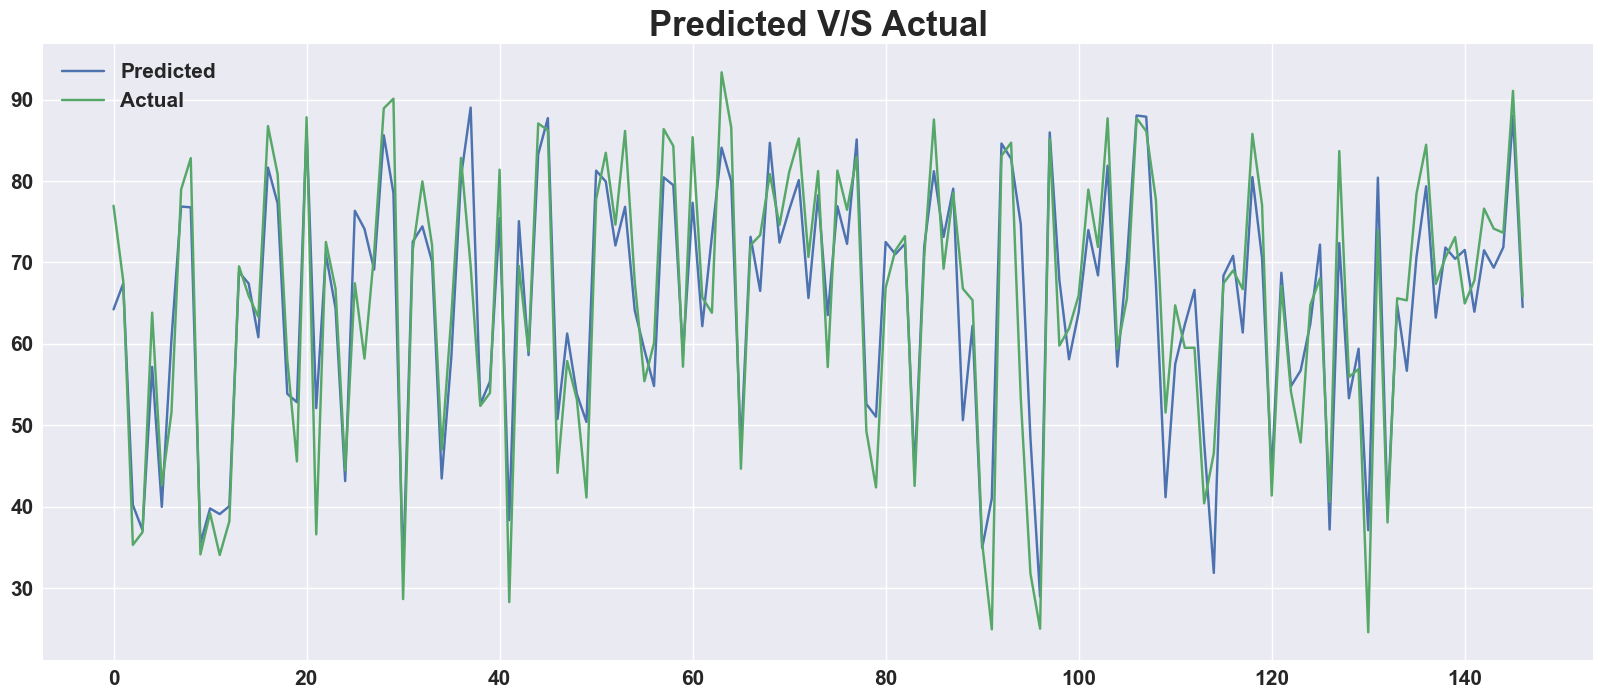

In [188]:
plot_Pred_vs_actual(y_pred_lasso,y_test)

Text(0.5, 0, 'y_predicted')

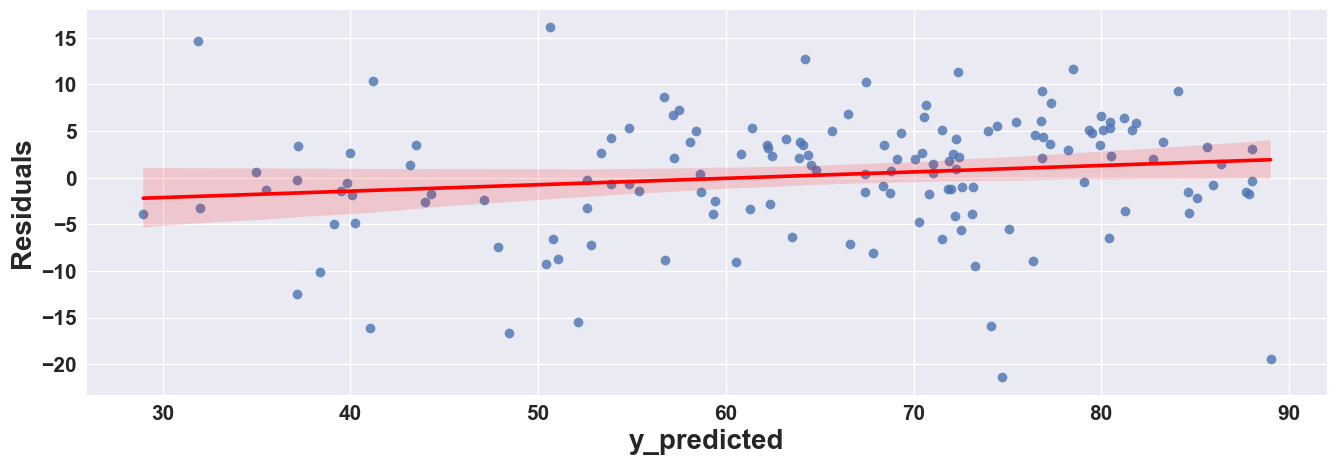

In [189]:
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred_lasso,y = y_test-y_pred_lasso,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

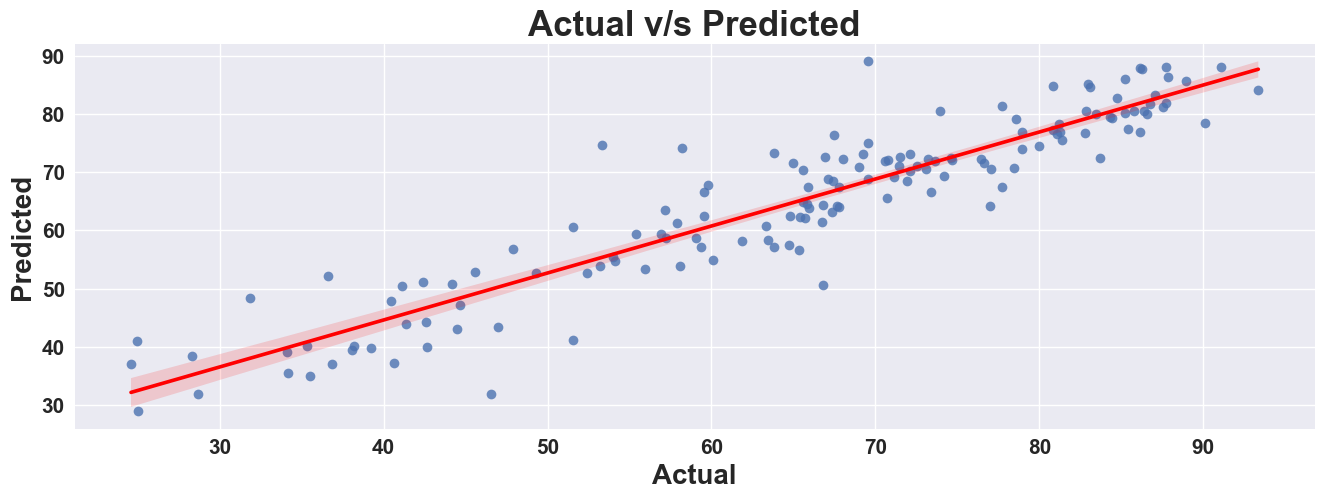

In [190]:
plot_scatter(y_pred_lasso,y_test)

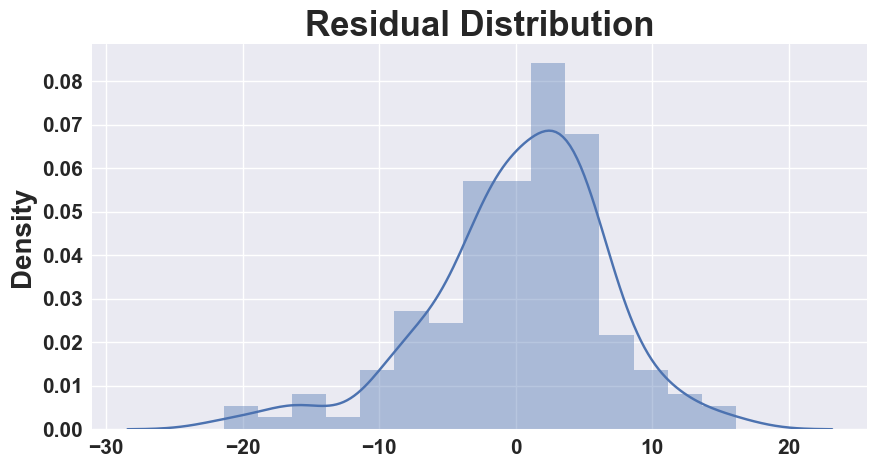

In [191]:
Residual_distPlot(y_pred_lasso,y_test)

# Ridge

In [192]:
# Initiating
ridge_reg = Ridge(alpha = 0.01)

In [193]:
# Fitting and training the model
ridge_reg.fit(X_train,y_train)

,alpha,0.01
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [194]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "ridge_model.pkl")

# Save the model
joblib.dump(ridge_reg, file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\ridge_model.pkl


In [195]:
# Check coefficient
ridge_reg.coef_

array([ 7.12366059e+00, -5.32222767e-01,  5.00799951e-01,  8.21863443e+00,
       -2.31113561e+00, -1.97571478e+00, -3.21248321e-01,  3.20242655e+00,
        3.39531651e+00,  5.95651948e+00,  5.15790382e-01,  1.43094278e+00,
        7.63959216e-01,  1.50601855e+00,  1.44819011e-01, -9.46595124e-01,
        1.96140961e-02,  1.35801425e+00,  6.59538573e-01, -7.46322712e-02,
        6.87773406e-02, -2.13909402e-01,  7.30650201e-02,  1.71136757e-03,
        1.93094696e-01,  3.53752879e-01,  7.67989542e-01, -1.12164444e+00,
       -3.01517447e+00])

In [196]:
# get dataframe of x columns and Coeficients
pd.DataFrame(ridge_reg.coef_,X.columns,columns=['Coeficients'])

,Coeficients
yr,7.123661
holiday,-0.532223
workingday,0.500800
temp,8.218634
hum,-2.311136
windspeed,-1.975715
weekend,-0.321248
season_2,3.202427
season_3,3.395317
season_4,5.956519


In [197]:
    # Check intercept
ridge_reg.intercept_

np.float64(65.2413014457131)

In [198]:
# Checking score
ridge_reg.score(X_train,y_train)

0.8397989705828093

In [199]:
# y predictions on training dataset
y_pred_train = ridge_reg.predict(X_train)
# y predictions on test dataset
y_pred_ridge = ridge_reg.predict(X_test)

In [200]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred_ridge)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred_ridge)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred_ridge)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 4.854304123535955.
 The Mean Squred Error(MSE) is 40.16602057793326.
The Root Mean Squared Error(RMSE) is 6.337666808687032.
The R2 Score is 0.858598274190085.
Adjusted R2 is 0.8235499831773712.


In [201]:
test_dict = {'Model':"Ridge(GridsearchCv Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [202]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,4.8595,40.3112,6.3491,0.8581,0.8229
1,Ridge(GridsearchCv Tunned),4.8543,40.1660,6.3377,0.8586,0.8235


In [203]:
# cross validation on Ridge regression
# creating object
ridge_rg = Ridge()

# alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_rg, alphas, scoring='neg_mean_squared_error', cv=4)
# fitting model
ridge_linear_reg.fit(X_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-15, 1e-13, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,5


In [204]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "ridge_model(CV).pkl")

# Save the model
joblib.dump(lasso_linear_reg, file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\ridge_model(CV).pkl


In [205]:
# Since it showing best parameter alpha= 1.. alpha =1 means it will be as linear regression.
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {ridge_linear_reg.best_score_}')

The best alpha value is {'alpha': 5}
The best negative mean squred error value is -45.65291132329172


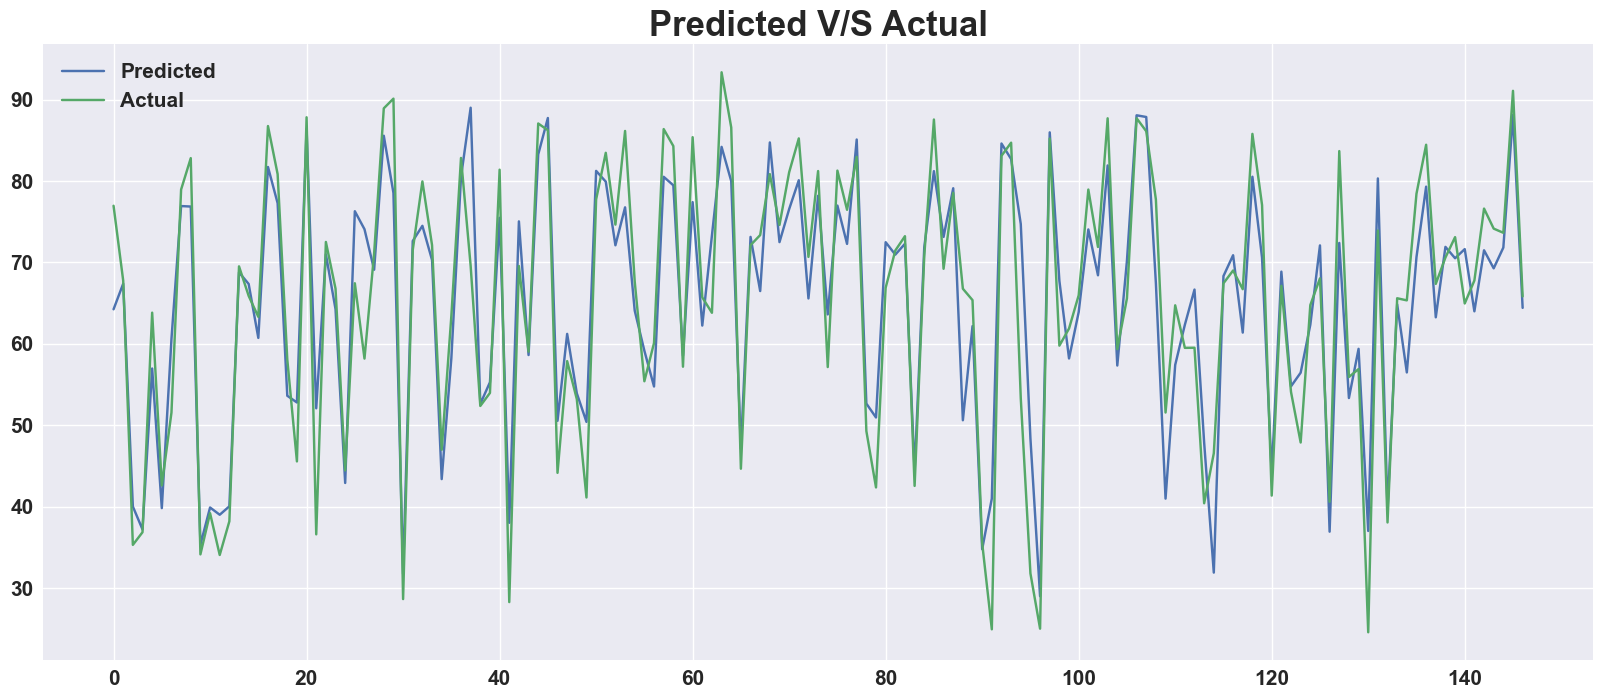

In [206]:
plot_Pred_vs_actual(y_pred_ridge,y_test)

Text(0.5, 0, 'y_predicted')

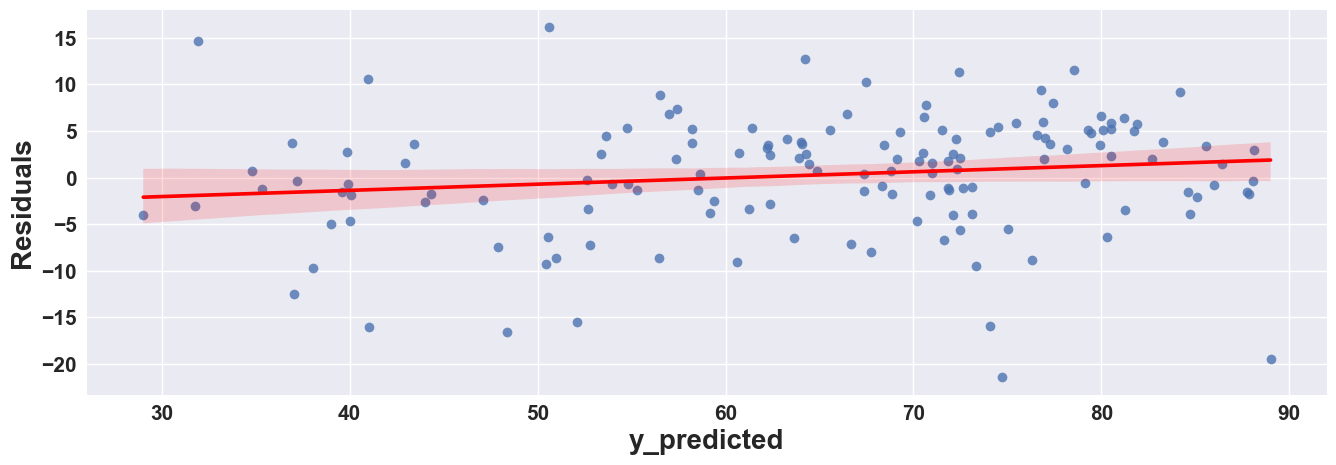

In [207]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_ridge,y=y_test-y_pred_ridge,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

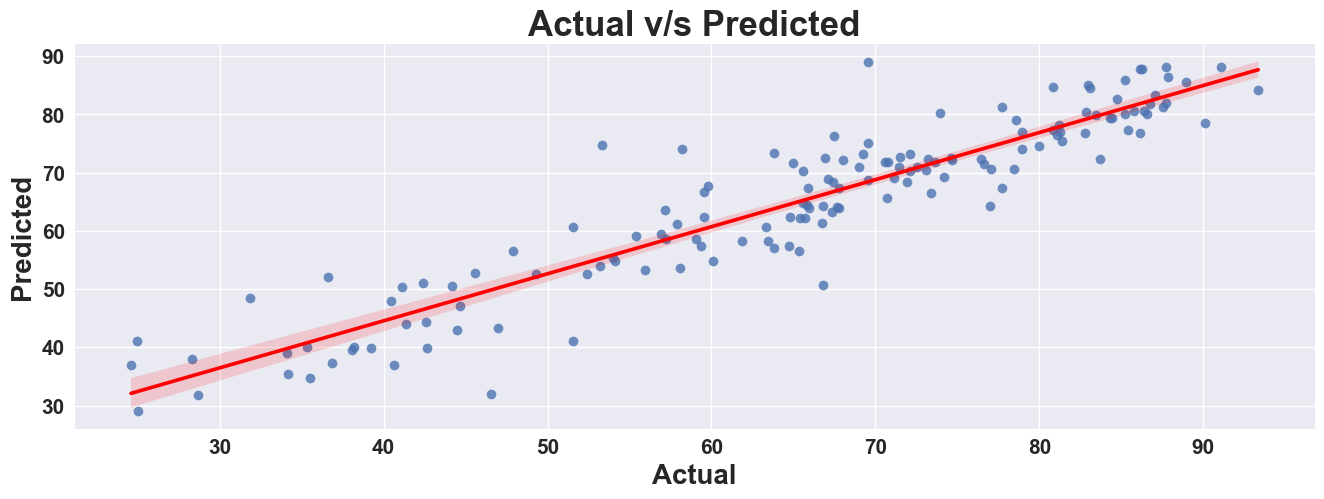

In [208]:
plot_scatter(y_pred_ridge,y_test)

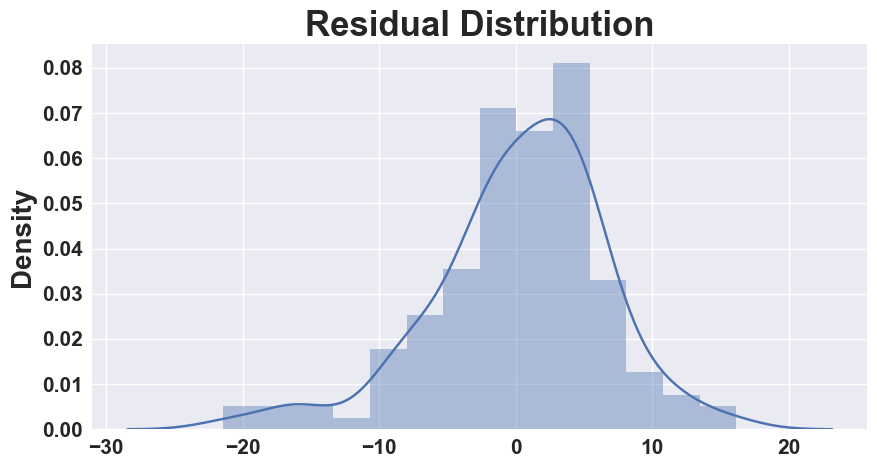

In [209]:
Residual_distPlot(y_pred_ridge,y_test)

# Elastic Net

In [210]:
elastic_net_reg = ElasticNet(alpha = 1e-05,l1_ratio = 0.3)
elastic_net_reg.fit(X_train,y_train)

,alpha,1e-05
,l1_ratio,0.3
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [211]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "elastic_net_model.pkl")

# Save the model
joblib.dump(elastic_net_reg, file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\elastic_net_model.pkl


In [212]:
y_pred_train = elastic_net_reg.predict(X_train)
y_pred_elastic = elastic_net_reg.predict(X_test)

In [213]:
# check score on test data
elastic_net_reg.score(X_test,y_test)

0.8585984971009717

In [214]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred_elastic)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred_elastic)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred_elastic)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.854287079825085.
The Mean Squred Error(MSE) is 40.1659572587396.
The Root Mean Squared Error(RMSE) is 6.337661813219415.
The R2 Score is 0.8585984971009717.
Adjusted R2 is 0.8235502613396741.


In [215]:
test_dict = {'Model':"ElasticNet(GridSearchCV-Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [216]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Lasso,4.8595,40.3112,6.3491,0.8581,0.8229
1,Ridge(GridsearchCv Tunned),4.8543,40.1660,6.3377,0.8586,0.8235
2,ElasticNet(GridSearchCV-Tunned),4.8543,40.1660,6.3377,0.8586,0.8236


In [217]:
elastic = ElasticNet()
alpha_l1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, alpha_l1, scoring='neg_mean_squared_error',cv=4)
elastic_regressor.fit(X_train, y_train)

,estimator,ElasticNet()
,param_grid,"{'alpha': [1e-15, 1e-13, ...], 'l1_ratio': [0.1, 0.2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.1


In [218]:
import joblib
import os

# Path of the folder where you want to save the file
save_folder = r"D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files"

# Full file path (folder + filename)
file_path = os.path.join(save_folder, "elastic_net_model(CV).pkl")

# Save the model
joblib.dump(elastic_regressor, file_path)

print(f"Model saved at: {file_path}")


Model saved at: D:\RideWise-Predicting-Bike-sharing-Demand\Modeling\Saved_Models_files\elastic_net_model(CV).pkl


In [219]:
print(f'The best alpha value is {elastic_regressor.best_params_}')
print(f'The best negative mean squred error value is {elastic_regressor.best_score_}')

The best alpha value is {'alpha': 0.1, 'l1_ratio': 0.9}
The best negative mean squred error value is -45.59773175732413


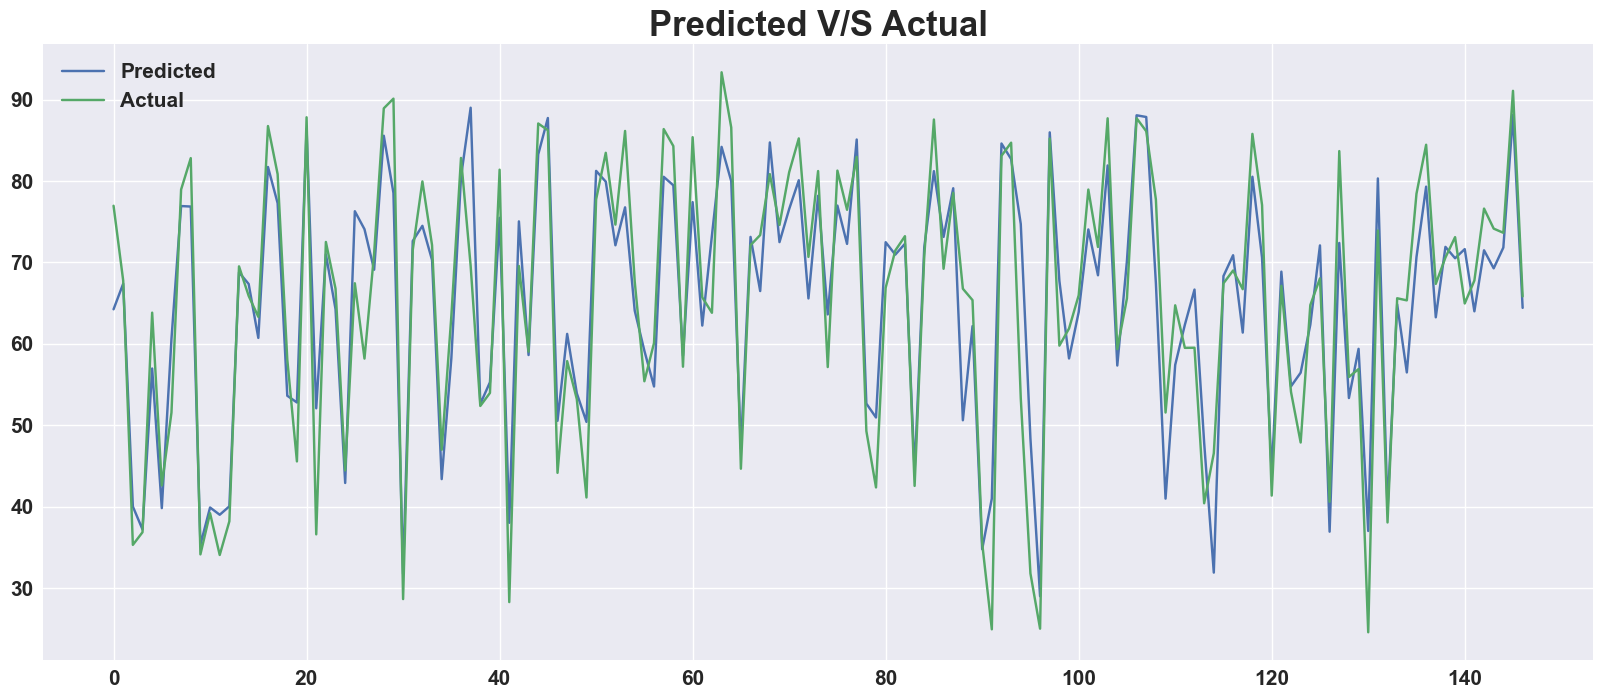

In [220]:
plot_Pred_vs_actual(y_pred_elastic,y_test)

Text(0.5, 0, 'y_predicted')

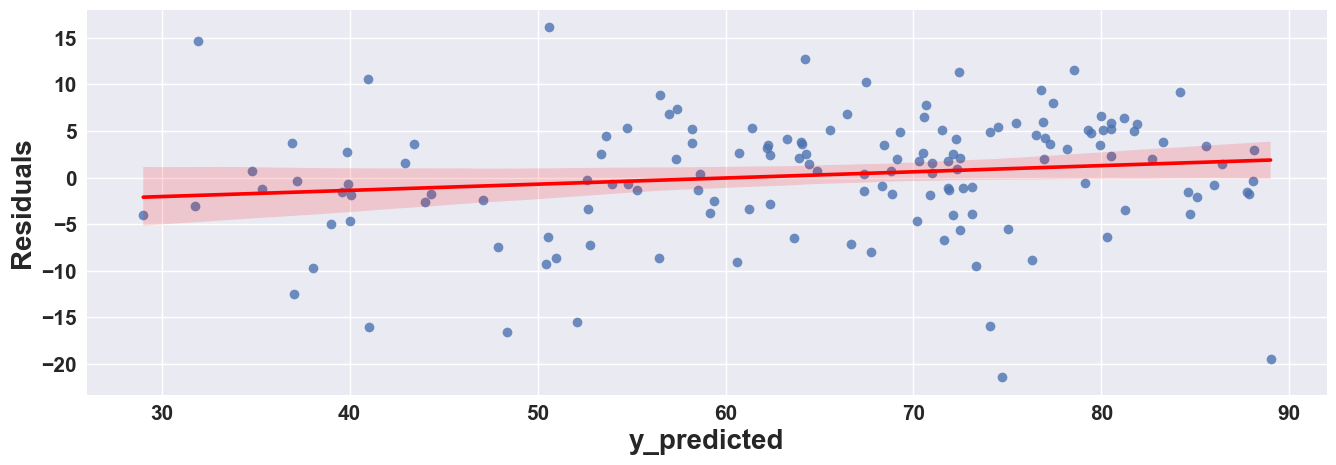

In [221]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred_elastic,y=y_test-y_pred_elastic,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

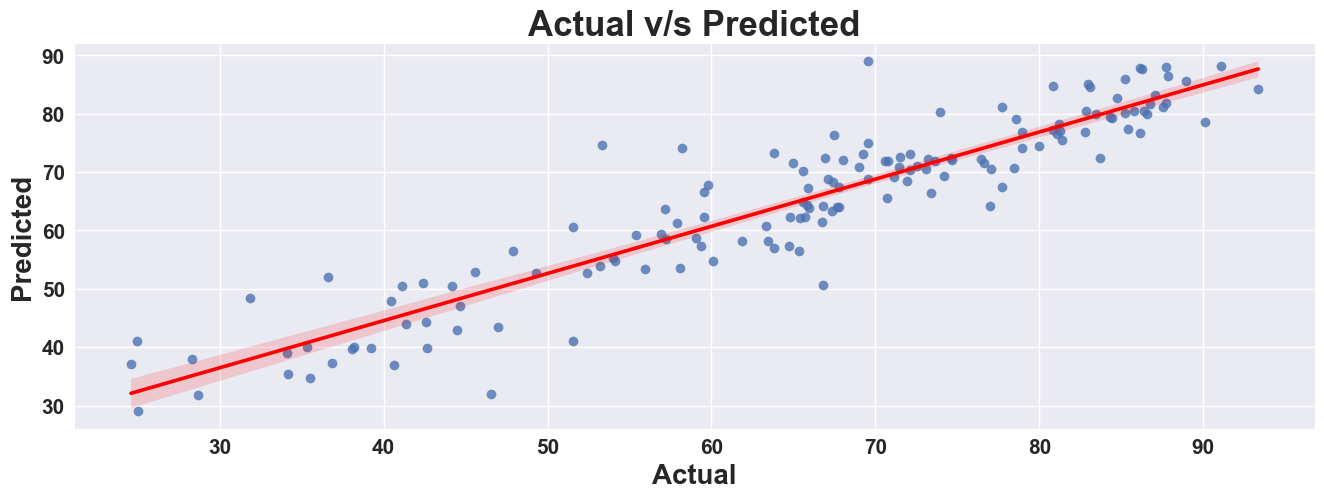

In [222]:
plot_scatter(y_pred_elastic,y_test)

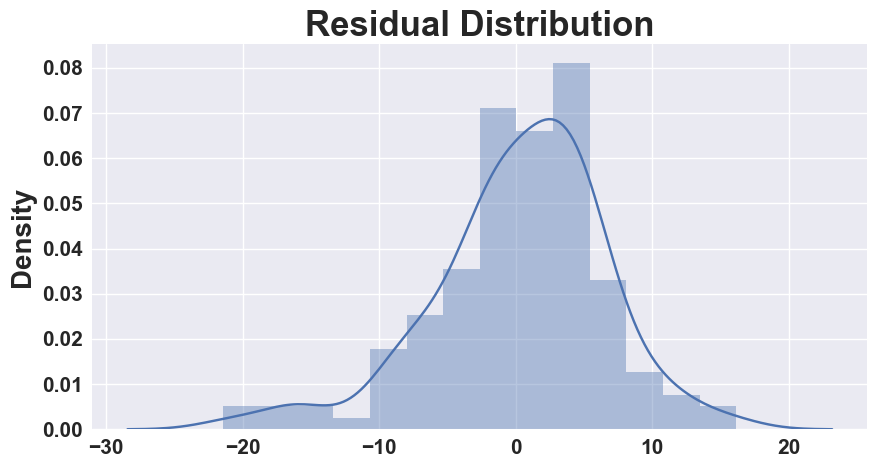

In [223]:
Residual_distPlot(y_pred_elastic,y_test)